## SCI-6354 Advanced Spatial Analysis - Code to Make Sense of Big Data


This workshop will introduce you to the basics of data management in Python, a popular high-level programming language. In particular, we will utilize the Pandas library to store and manipulate data. While learning to code is a long-term endeavor, this document aims to get you comfortable with running some of Panda's convenient built-in functions for data management.

We will be using NYC's [311 Service Request dataset from 2015](https://data.cityofnewyork.us/dataset/311-Service-Requests-From-2015/57g5-etyj), in the form of a CSV text file. The file contains about 2.2 million rows of data and is about 1.5 GB — too large to comfortably use in Excel! Python will allow us to efficiently read, parse, clean and even visualize this data.

_Make sure to save the datafile to somewhere within the **same folder or directory as this notebook file.**_

**CONTENTS**

 **1. Getting Started**
 
**2. A (Very) Brief Intro to Programming in Python:** variables, conditionals, loops, print, functions, libraries

**3. Using Pandas:** importing, viewing, slicing, exporting a CSV

**4. Big Data:** cleaning (string operations and parsing dates)

**5. Optional:** pivot tables and plotting

---

### 1. Getting Started

Requirements will vary with your current system, but in general you will need to have:
- [311 Service Request dataset from 2015](https://data.cityofnewyork.us/dataset/311-Service-Requests-From-2015/57g5-etyj) from NYC's Open Data portal
- Python (ideally v2, but v3 works too)
- Jupyter Notebook and Pandas for Python


For Python, I highly recommend installing [Anaconda](https://www.continuum.io/downloads), a free all-in-one distribution package that includes the above, wrapped in neat GUI. This will significantly reduce the need to operate in Terminal or the Command Line. Anaconda can be found at [https://www.continuum.io/downloads](https://www.continuum.io/downloads).

The Jupyter Notebook is a browser-based application and file format, hosted locally, that allows you to run Python in cells. Each cell is a chunk of code that can be run separately — but still share variables, functions and libraries within the script. This makes it much easier to understand what's going on, iterate on code and debug problematic code.

After install, get started by opening the Navigator application and clicking on Jupyter Notebook.

<img src="Navigator.png">

You'll see a terminal or command line window, but fear not! In a few moments a much friendlier web-interface will open up.

<img src="Jupyter Click.png">

In order to run this tutorial, navigate to the location of the notebook file (.ipynb), select the file and launch!

<img src="Jupyter New Notebook.png">

If you're starting your own project, navigate to the desired folder and create a new Jupyter Notebook — this will create a file (.ipynb) in that location.

---

### 2. Intro to Programming and Python

Python is a high-level language that simplifies some of the complexity of code. In some instances it can _almost_ be read like plain English. If you're familiar with C, Processing/Java or Javascript, you'll find that Python makes a lot of operations a little easier to understand and write.

For those without prior coding experience, this document should help you understand how to read and tweak existing code. As we progress through this tutorial, I'll try and annotate some of what's going on. A few key principles:

- __Indentation and whitespace matter__: Python logic uses indents (no need to worry about semicolons) — without proper spacing things will break!
- __Style saves you time:__ Keep code legible and  organized! Following portions of the [PEP-8](https://www.python.org/dev/peps/pep-0008/) style guide will make your code more legible to others.
- __Make sense:__ Take advantage of Python's human-readable syntax with descriptive variable and function names.
- __Keep commenting:__ Leaving comments (with the # symbol) in your code will save you time when you return to it.

Within the Jupyter Notebook, you can run any cell by clicking on the run button (you can also CTRL-R).

<img src="Jupyter Run.png">

In [84]:
from __future__ import print_function                      # Don't mind this.

# Welcome to Python and Jupyter Notebooks!
# Run this cell block by clicking the run cell button or CTRL+R or SHIFT+R

example_number = 5                                         # Variable assignment with numbers
example_array = [1,2,3,4,example_number, "... whoops!"]    # Array assignment with numbers
example_text = "Hi there! Here's a number:"                # Variable assignment with strings

# Printing
print(example_text, example_array[0])                      # Printing ... your primary de-bugging tool!
print(example_text, example_array[5])

Hi there! Here's a number: 1
Hi there! Here's a number: ... whoops!


In [85]:
# Functions definition 
def example_function(repeats):                  # Argument(s)
    for repeat in range(repeats+1):             # Loops
        if repeat != repeats:                   # Conditionals
            print("Counting ...", repeat+1)
        else:
            print("Done!")
    return repeats*10                           # Function output
        
result = example_function(10)                   # Saving function output to a variable
result                                          # Note that the last thing in a cell gets displayed below

Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Counting ... 7
Counting ... 8
Counting ... 9
Counting ... 10
Done!


100

In [10]:
# Importing libraries
import time

print("The time (in seconds) is:", time.time())    # Method

The time (in seconds) is: 1491773332.31


___

### 3. Using Pandas

Pandas is a fantastic library for data. It provides a wide range of pre-built functions that enable all sorts of manipulations on large datasets. It is rapidly becoming essential to data science and other quantitative fields, as its data structures can be used with other libraries for visualization, analysis and modeling (from linear regressions to more complex machine learning algorithms!).

I'll try and go through some key functions, but for further help:

- __Read the docs:__ Always refer to the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to understand functions and their expected arguments. Also, the summarized [Pandas cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-csv) can sometimes be more direct!
- __Short tutorials:__ Chris Albon has a [great website](https://chrisalbon.com) full of quick articles on specific Pandas operations
- __Longer tutorials:__ For those with some time, Brandon Rhode's [2.5-hour introduction](https://www.youtube.com/watch?v=5JnMutdy6Fw) and accompanying [tutorials](https://github.com/brandon-rhodes/pycon-pandas-tutorial) are probably the best way to learn correctly!

**Importing libraries**

While you've installed Pandas, you will always need to import Pandas into a Python script.  We do this with:

    import pandas as pd

This both imports the library and creates the shorthand "pd" to make it easier to access. In general, Pandas and a few other libraries are imported this way by established convention. Stick to convention, whenever possible!

In [11]:
# Let's begin by importing pandas
import pandas as pd

# Also import some other libraries we may use later.
import numpy as np

**Loading from a file to a data frame**

Before we deal with big data, let's use a subset of the 311 data to understand Pandas. We'll do this with our first Pandas function:
    
    pd.read_csv()

The function reads a text file into Python and converts it into a Pandas data frame - a _m_ x _n_ table. It can take many arguments or inputs, but the most important ones are:

- **filepath** the path to the data in question
- **sep** or **delimiter** the separation character, defaults to a comma but can be changed if you have a TSV
- **nrows** the number of rows

There are additional arguments you can include to do things like parse dates, set data types or handle null values. Pandas also includes functions for directly importing Excel files to a data frame; you can also manually construct data frames. 

We want to use this function to load our data _and_ save it to a Python variable. Let's try it — but since loading all 2 million rows would take some time, let's first attempt it on 1,000 rows.

_Make sure you **change the filepath argument** to reflect your data location!_ 


In [17]:
# Quickly open just the first 10,000 rows of the CSV file
# We will store the result of the function in a variable called "preview"

preview = pd.read_csv("Data/311_Service_Requests_from_2015.csv",          # Check the filepath!
                      nrows=100)

print("Done loading the data frame!")

Done loading the data frame!


**Viewing the data**

Great - your data has been loaded into a variable as a data frame. But how do you know what's inside? Before operating on data, always check it out! Pandas offers a variety of properties and methods to quickly view this data. You can access them by adding a period and the property or method name after the data frame variable, i.e.:

    data_frame_variable.property
    data_frame_variable.method()


Make sure you **pay attention to parentheses** — they distinguish between a property and a method, and the code won't work with or without, depending.

Some essential properties and methods for doing this are:

- **shape** gives you dimensions
- **columns** does what it says on the tin
- **index** does what it says on the tin
- **values** directly exposes the raw data
- **head()** or **tail()** gives you the first or last 5 rows, by default. Changing the number argument inside gives you a specific number rows. 

More advanced but very useful are:

- **describe()** gives you quick summary statistics
- **info()** gives you a summary of data frame dimensions, column names and data types


Let's try to explore the excerpted 311 data. Keep in mind that Jupyter Notebook will automatically display the last line of a cell.

In [18]:
# Quick preview of the data frame
preview.shape

(100, 53)

In [21]:
# We can also save the results of method or property to a variable
dimensions = preview.shape

print("The data is", dimensions[0], " rows by ", dimensions[1], " columns.")

The data is 100  rows by  53  columns.


In [4]:
# QUIZ: Can you get a list of all columns in the data frame?

**Selecting data**

Now that you now what's inside the data frame, we can access specific sections of it. Pandas offers many ways to do this!

You can return a specific column via:

    data_frame_variable["column name"]
    data_frame_variable[column number]

Return a range of rows via:

    data_frame_variable[start row : end row]
    
Select a slice via:

    data_frame_variable.loc[row labels, column labels]
    data_frame_variable.iloc[row integer positions, column integer positions]

Remember that Python is zero-indexed. Selection methods are better understood in practice! A few quick notes:

- **.loc** gives you a slice along both rows and columns whenever you have either all labels or mixed labels and position integers
- **.iloc** does the same, but only with integer positions

In [24]:
# Get the responsible city agency and complaint type for the first ten 311 calls in the data
preview.loc[0:10,["Complaint Type", "Agency"]]

,Complaint Type,Agency
0,Consumer Complaint,DCA
1,Vending,NYPD
2,Blocked Driveway,NYPD
3,Noise - Commercial,NYPD
4,Noise - Street/Sidewalk,NYPD
5,Standing Water,DOHMH
6,Root/Sewer/Sidewalk Condition,DPR
7,Standing Water,DOHMH
8,Consumer Complaint,DCA
9,Noise - Street/Sidewalk,NYPD


In [2]:
# QUIZ: Can you get the last 10 rows ?

**Filtering data**

Pandas also lets you filter data with Booleans. For filtering, you can combine the selection methods above with a conditional, in the form:

    data_frame_variable[data_frame_variable[selection] + logical test]]
    
It looks a bit redundant, but what this is actually doing is selecting all rows based on a mask — an array of True and False values. You'll see this for yourself if you run just the conditional statement. In theory, you could filter data with any mask of the right length.
  
Conditionals can work with both numbers and text (i.e. integer, float and string data types). Some useful operators for numeric values are:

- **==** equals
- **>**  greater than
- **<**  less than or equal
- **>=** greater than or equal
- **<=** less than or equal

Some useful operators for string values are:

- **isin()**
- **str.contains()**
- **str.startswith()**
- **str.endswith()**

Generally useful:

- **isnull()**
- **notnull()**

If you _really_ want to get compicated, you can apply multiple conditions by enclosing each individual statement with parenthesis and combining with the symbols for and and or ( **&** and **|** ) — for example:

    data_frame_variable[(conditional 1) & (conditional 2)]

In [8]:
# Filter for all DPR releated complaints in the Bronx and Queens
preview[((preview["Borough"]=="BRONX")
         | (preview["Borough"]=="QUEENS"))
         & (preview["Agency"]=="DPR")]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
6,31043076,07/09/2015 12:04:06 PM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,10469.0,3344 PEARSALL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.873552,-73.851666,"(40.8735519638795, -73.85166629554799)"
10,31495596,09/09/2015 12:12:46 PM,12/15/2015 02:07:21 PM,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Power/Phone Lines,Street,11412.0,197-16 LINDEN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.693751,-73.754719,"(40.693751390945614, -73.7547190161349)"
11,31593923,09/22/2015 01:50:05 PM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Affecting Sewer or Foundation,Street,11413.0,139-02 SOUTHGATE PLAZA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673440,-73.758456,"(40.67343967153766, -73.75845642658422)"
13,31593599,09/22/2015 03:07:51 PM,NaN,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Power/Phone Lines,Street,11001.0,86-15 262 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733555,-73.704955,"(40.7335546067691, -73.704954968102)"
26,31591848,09/22/2015 08:51:13 PM,02/16/2016 01:44:34 PM,DPR,Department of Parks and Recreation,Illegal Tree Damage,Unauthorized Tree Removal,NaN,11378.0,5310 69TH ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.731155,-73.896021,"(40.731154603318835, -73.8960206506641)"
27,31593561,09/22/2015 10:29:56 AM,10/13/2015 11:01:42 AM,DPR,Department of Parks and Recreation,Damaged Tree,Branch Cracked and Will Fall,Street,11364.0,53-48 BELL BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.751748,-73.763532,"(40.75174757106758, -73.76353224937567)"
29,31591347,09/22/2015 01:06:44 PM,11/11/2015 01:34:37 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11358.0,35-27 171 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.764134,-73.794967,"(40.764134495293504, -73.79496691492976)"
31,31594659,09/22/2015 09:05:40 AM,11/27/2015 12:25:29 PM,DPR,Department of Parks and Recreation,Damaged Tree,Tree Alive - in Poor Condition,Street,11429.0,223-29 113 DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702478,-73.733974,"(40.702477623959254, -73.7339741977541)"


In [3]:
# QUIZ: Can you filter all music-related complaints at clubs?

**Summary operations**

Pandas also gives us simple access to summary operations on data frames.

- **value_counts()**
- **unique()**
- **max()**
- **min()**
- **mean()**
- **median()**
- **mode()**

In [39]:
# Let's get the number of complaints by agency
preview["Agency"].value_counts()

NYPD     61
DPR      13
DOT      11
DCA       4
DOHMH     4
HRA       2
HPD       2
DOF       1
DOB       1
DSNY      1
Name: Agency, dtype: int64

In [5]:
# QUIZ: Can you get a list of unique complaint types?

**Export data**

Last but not least, we can get data out of Python as a CSV or an Excel file, by supplying a path as an argument.

- **to_csv()** 
- **to_excel()** 

In [52]:
# Here's an example file!
preview.to_csv("example.csv")

---

### 4. Real Big Data

Now that we've seen what Pandas can do, let's give it a shot on the real thing. It may take a moment to load the full 311 dataset, so go ahead and run the cell below this one.

With the full dataset at our disposal, we're going to try a select only noise-related complaints over a specific time frame. We will then export a smaller file with coordinates, suitable for use in other applications: Excel, GIS, Rhino or CartoDB. Here's the general workflow:

- import the data
- view the data
- filter and clean the data
- export the data

In [54]:
# Load the data from CSV to data frame ... will be slow and memory dependent
data = pd.read_csv("Data/311_Service_Requests_from_2015.csv")

# How big is the full data?
print(data.shape)

# Preview as a data frame
data.head()

/Users/brianho/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,17,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2282093, 53)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


In [64]:
# Let's identify the 10 most common complaints:
data["Complaint Type"].value_counts().head(10)

HEAT/HOT WATER            225083
Noise - Residential       207390
Street Condition          124257
Blocked Driveway          100569
Street Light Condition     98027
Illegal Parking            92434
UNSANITARY CONDITION       82740
Water System               71009
PAINT/PLASTER              69571
Noise                      57294
Name: Complaint Type, dtype: int64

In [65]:
# Notice the mixed cases in the complaints - this will complicate string operations.
# Let's format all the complaint types to lowercase for convenience when searching
data['Complaint Type'] = data['Complaint Type'].str.lower()

# Now identify the 25 most common complaints:
data["Complaint Type"].value_counts().head(10)

heat/hot water            225083
noise - residential       207390
street condition          124257
blocked driveway          100569
street light condition     98027
illegal parking            92434
unsanitary condition       82740
water system               71009
paint/plaster              69571
plumbing                   59947
Name: Complaint Type, dtype: int64

In [68]:
# Extract all noise-related complaints with a filter
# Save the results to a new data frame
noise_data = data[data["Complaint Type"].str.contains("noise")]
noise_data.shape

(386510, 53)

In [69]:
# Can I select by a time?
noise_data[noise_data["Created Date"] > 20151201].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,noise - commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"
9,31492526,09/09/2015 09:59:03 PM,09/09/2015 11:17:39 PM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,11238,238 SAINT JAMES PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.683308,-73.963775,"(40.68330795503152, -73.96377504548408)"
14,30502370,04/28/2015 06:26:58 PM,04/28/2015 07:29:34 PM,NYPD,New York City Police Department,noise - commercial,Car/Truck Music,Store/Commercial,10035,1911 MADISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.804617,-73.941505,"(40.80461674564084, -73.9415053197214)"
19,30668699,05/21/2015 07:01:52 PM,05/21/2015 09:56:29 PM,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,10026,8 WEST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797731,-73.949399,"(40.79773121644539, -73.94939942634502)"


In [70]:
# It looks like the "Created Date" and "Closed Date" columns contain strings, not actual dates.
noise_data["Created Date"].dtype

dtype('O')

In [71]:
# While Pandas has a built in date parser, it spends time interpreting each date string.
# This gets slow on big datasets — we'll need to write a custom parser.
import datetime

# custom datetime converter
# faster because it builds unique set of parsed dates and saves duplicates for reuse via lookup
# note that we utilize the utility functions defined below
def custom_datetime_lookup(df):
    dates = {date:custom_to_datetime(date) for date in df.unique()}
    return df.map(dates)

# custom datetime parsing from string of format "MM/DD/YYYY HH:MM:SS"
# faster (by about 6x) because it performs string operations on known format
def custom_to_datetime(val):
    if val == val and val != "nan" and val: # error handling
        return datetime.datetime(
        int(val[6:10]), # %Y
        int(val[0:2]), # %m
        int(val[3:5]), # %d
        am_pm(val), # %H
        int(val[14:16]), # %M
        int(val[17:19])) # %s
    else:
        return None

# short function to convert 12-hour digits to 24-hour datetime
def am_pm(val):
    if "PM" in val[-2:]:
        if int(val[11:13]) != 12:
            return int(val[11:13])+12
        else:
            return int(val[11:13])
    if "AM" in val[-2:]:
        if int(val[11:13]) != 12:
            return int(val[11:13])
        else:
            return 0

In [72]:
# Parse the dates with our custom converter
noise_data["Created Date"] = custom_datetime_lookup(noise_data["Created Date"])
noise_data["Closed Date"] = custom_datetime_lookup(noise_data["Closed Date"])

/Users/brianho/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/brianho/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [73]:
# Now we can select with real time values.
# Try some of the following, or create your own!
noise_data[noise_data["Created Date"] > "2015-11-30"].head()
noise_data[noise_data["Created Date"].dt.month > 11].head()
noise_data[noise_data["Created Date"].dt.dayofweek == 6].head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
49,30958252,2015-06-28 13:33:13,2015-06-28 13:57:25,NYPD,New York City Police Department,noise - street/sidewalk,Loud Music/Party,Street/Sidewalk,10025,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.795464,-73.963804,"(40.79546400452747, -73.96380430660172)"
116,31059001,2015-07-12 23:12:37,2015-07-12 23:27:14,NYPD,New York City Police Department,noise - commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
118,31061499,2015-07-12 21:40:03,2015-07-13 00:18:58,NYPD,New York City Police Department,noise - commercial,Loud Music/Party,Club/Bar/Restaurant,10012,333 LAFAYETTE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.725761,-73.994776,"(40.725761324016, -73.99477583879312)"
127,31526296,2015-09-13 22:20:37,2015-09-13 22:53:46,NYPD,New York City Police Department,noise - commercial,Loud Music/Party,Club/Bar/Restaurant,11237,140 WILSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700623,-73.925595,"(40.70062282432436, -73.92559458449325)"
131,31527799,2015-09-13 22:08:39,2015-09-13 23:04:55,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,10452,1214 SHAKESPEARE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837156,-73.923299,"(40.83715568860275, -73.9232988537014)"


In [74]:
# Datasets are often messy or incomplete. In this case, several of the rows contain null values.
# We can remove those easily with Pandas.
noise_data = noise_data.dropna(subset=['Incident Address', 'Latitude', 'Longitude'])

noise_data.shape

(337976, 53)

In [76]:
# Finally, let's select midday and midnight complaints only
noise_data_midnight = noise_data[noise_data["Created Date"].dt.hour==0]
noise_data_noon = noise_data[noise_data["Created Date"].dt.hour==12]

print(noise_data_midnight.shape, noise_data_noon.shape)

(33630, 53) (7390, 53)


In [77]:
# Export that data!
noise_data_midnight.loc[:,["Created Date",
                           "Agency",
                           "Complaint Type",
                           "Latitude",
                           "Longitude"]].to_csv("noise_midnight.csv", date_format="%Y-%m-%d %H:%M")

noise_data_noon.loc[:,["Created Date",
                           "Agency",
                           "Complaint Type",
                           "Latitude",
                           "Longitude"]].to_csv("noise_noon.csv", date_format="%Y-%m-%d %H:%M")

With your data successfully exported to a smaller CSV, you have a file ready for use in other applications!

<img src="Carto.png">

### 5. Optional - Pivots 'n Plotting

For the interested, we can use a few more Pandas functions to build some more complex summary datasets. The goal is to make a plot of total noise complaints per hour.

In [78]:
# We'll need an additional column with just the hour
hour = noise_data["Created Date"].dt.floor("60min").to_frame("Hour of Day")
hour.head()

,Hour of Day
3,2015-07-03 02:00:00
4,2015-07-04 00:00:00
9,2015-09-09 21:00:00
14,2015-04-28 18:00:00
19,2015-05-21 19:00:00


In [79]:
# Let's join the column to the rest of the data
noise_data_2 = noise_data.join(hour)
noise_data_2.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Hour of Day
3,31000038,2015-07-03 02:18:32,2015-07-03 07:54:48,NYPD,New York City Police Department,noise - commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)",2015-07-03 02:00:00
4,30995614,2015-07-04 00:03:27,2015-07-04 03:33:09,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)",2015-07-04 00:00:00
9,31492526,2015-09-09 21:59:03,2015-09-09 23:17:39,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,11238,238 SAINT JAMES PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.683308,-73.963775,"(40.68330795503152, -73.96377504548408)",2015-09-09 21:00:00
14,30502370,2015-04-28 18:26:58,2015-04-28 19:29:34,NYPD,New York City Police Department,noise - commercial,Car/Truck Music,Store/Commercial,10035,1911 MADISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.804617,-73.941505,"(40.80461674564084, -73.9415053197214)",2015-04-28 18:00:00
19,30668699,2015-05-21 19:01:52,2015-05-21 21:56:29,NYPD,New York City Police Department,noise - street/sidewalk,Loud Talking,Street/Sidewalk,10026,8 WEST 111 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.797731,-73.949399,"(40.79773121644539, -73.94939942634502)",2015-05-21 19:00:00


In [80]:
# Make a pivot table based on time
# Note the aggregation functions - we need one that's counting to get the number of complaints
pivot = pd.pivot_table(noise_data_2,
                        index = "Hour of Day", 
                        aggfunc={"Hour of Day":"count",
                                 "Borough": lambda x:x.value_counts().index[0]}) # Anonymous function

pivot.head()

,Borough,Hour of Day
Hour of Day,,
2015-01-01 00:00:00,MANHATTAN,117
2015-01-01 01:00:00,MANHATTAN,123
2015-01-01 02:00:00,MANHATTAN,148
2015-01-01 03:00:00,BROOKLYN,101
2015-01-01 04:00:00,MANHATTAN,121


<function matplotlib.pyplot.show>

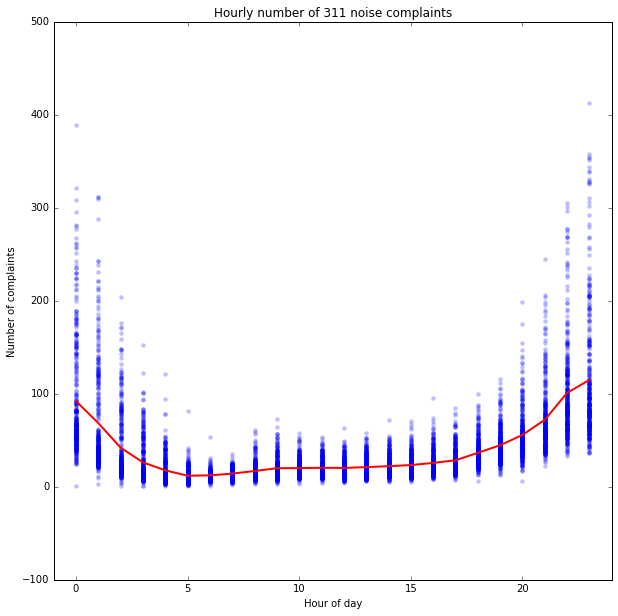

In [81]:
# Bring in the matplotlib plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Create a figure with size 10 x 10
fig = plt.figure(figsize=(10,10))

# Create a variable to hold the graph axis
ax = fig.add_subplot(1,1,1)

# Add graphics to the axis
ax.scatter(pivot.index.hour, pivot["Hour of Day"], alpha=0.25, lw=0)
ax.plot(range(24), [np.mean(pivot[pivot.index.hour==i]["Hour of Day"]) for i in range(24)],
        c="red",
        lw=2)

# Some formatting
ax.set_title("Hourly number of 311 noise complaints")
ax.set_xlim([-1,24])
ax.set_xlabel("Hour of day")
ax.set_ylabel("Number of complaints")

# Show the result
plt.show